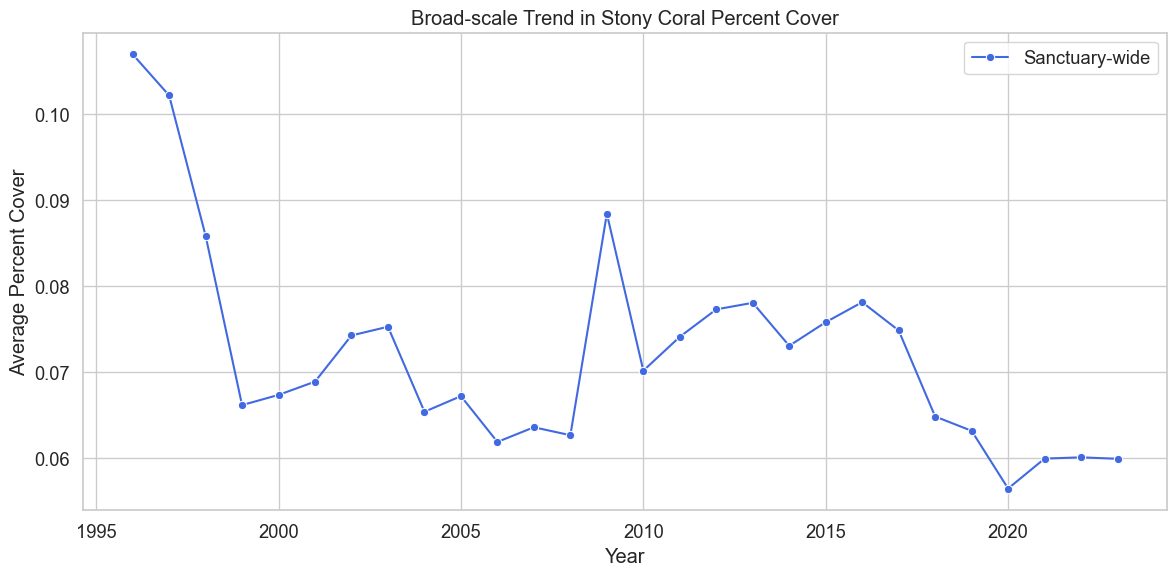

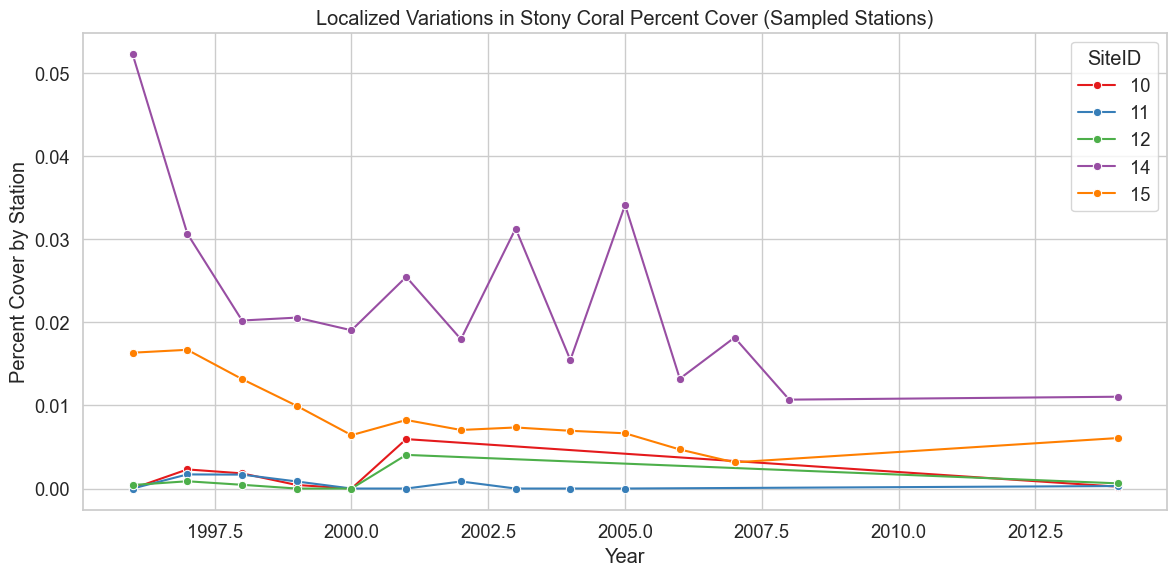

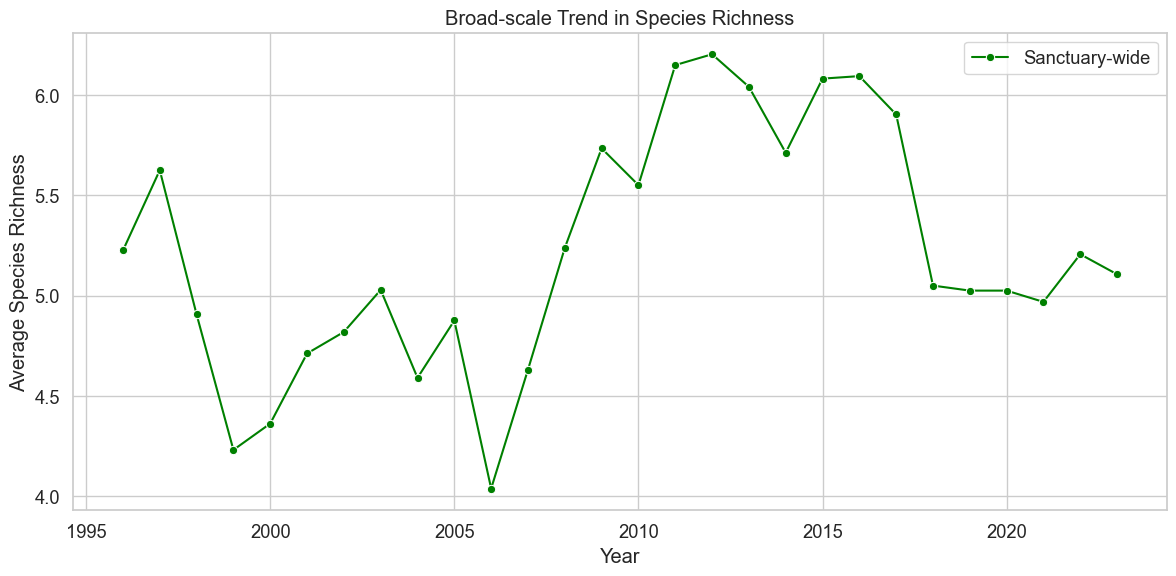

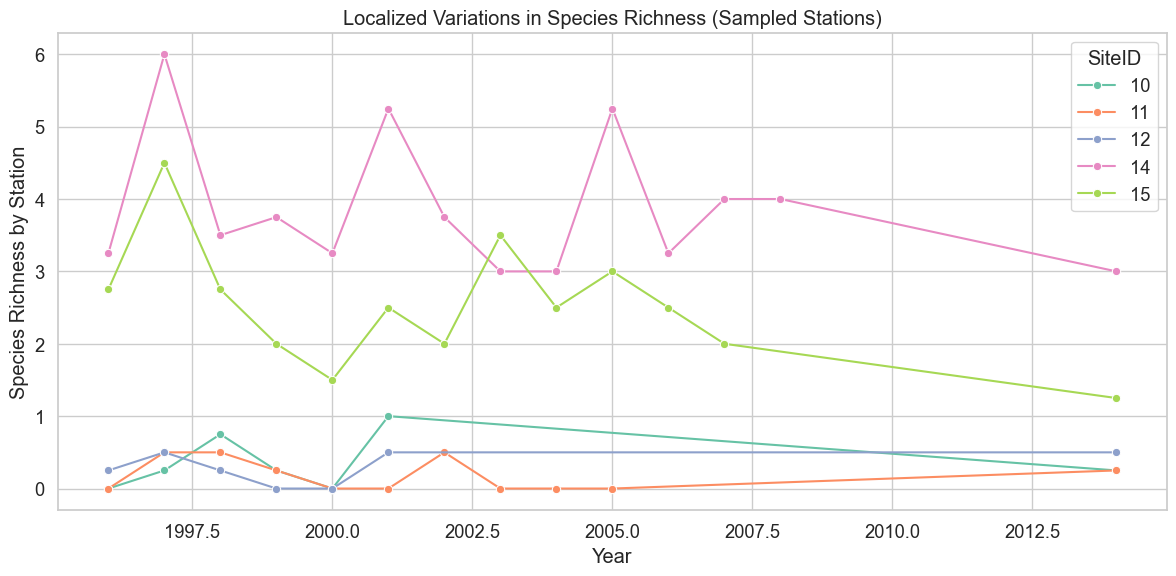

In [ ]:
### Identify localized variations versus broad-scale ecosystem changes. ###

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your stony coral percent cover dataset
df = pd.read_csv("../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv")

# Create 'Total_StonyCoral' column by summing all species columns
species_cols = df.columns[10:-1]  # Assuming species start at column 10 and end before 'row_index'
df['Total_StonyCoral'] = df[species_cols].sum(axis=1)

# Calculate species richness per year (species with >0 cover)
df['Species_Richness'] = df[species_cols].gt(0).sum(axis=1)

# 1. Broad-scale trends: Sanctuary-wide (average over all stations)
broad_scale_cover = df.groupby('Year')['Total_StonyCoral'].mean().reset_index()
broad_scale_richness = df.groupby('Year')['Species_Richness'].mean().reset_index()

# 2. Localized variations: Station-level (e.g., by SiteID)
localized_cover = df.groupby(['Year', 'SiteID'])['Total_StonyCoral'].mean().reset_index()
localized_richness = df.groupby(['Year', 'SiteID'])['Species_Richness'].mean().reset_index()

# Plotting the trends
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plot 1: Broad-scale (Sanctuary-wide) percent cover
plt.figure(figsize=(12, 6))
sns.lineplot(data=broad_scale_cover, x='Year', y='Total_StonyCoral', marker='o', label='Sanctuary-wide', color='royalblue')
plt.title('Broad-scale Trend in Stony Coral Percent Cover')
plt.xlabel('Year')
plt.ylabel('Average Percent Cover')
plt.tight_layout()
plt.savefig("../objectives/broad_scale_stony_coral_cover.png")
plt.show()

# Plot 2: Localized (Station-level) percent cover - using a subset of stations to reduce clutter
sample_stations = localized_cover['SiteID'].unique()[:5]  # Example: first 5 stations for visualization
subset_localized_cover = localized_cover[localized_cover['SiteID'].isin(sample_stations)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset_localized_cover, x='Year', y='Total_StonyCoral', hue='SiteID', marker='o', palette="Set1")
plt.title('Localized Variations in Stony Coral Percent Cover (Sampled Stations)')
plt.xlabel('Year')
plt.ylabel('Percent Cover by Station')
plt.tight_layout()
plt.savefig("../objectives/localized_stony_coral_cover_sampled_stations.png")
plt.show()

# Plot 3: Broad-scale (Sanctuary-wide) species richness
plt.figure(figsize=(12, 6))
sns.lineplot(data=broad_scale_richness, x='Year', y='Species_Richness', marker='o', label='Sanctuary-wide', color='green')
plt.title('Broad-scale Trend in Species Richness')
plt.xlabel('Year')
plt.ylabel('Average Species Richness')
plt.tight_layout()
plt.savefig("../objectives/broad_scale_species_richness.png")
plt.show()

# Plot 4: Localized (Station-level) species richness - using a subset of stations
subset_localized_richness = localized_richness[localized_richness['SiteID'].isin(sample_stations)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=subset_localized_richness, x='Year', y='Species_Richness', hue='SiteID', marker='o', palette="Set2")
plt.title('Localized Variations in Species Richness (Sampled Stations)')
plt.xlabel('Year')
plt.ylabel('Species Richness by Station')
plt.tight_layout()
plt.savefig("../objectives/localized_species_richness_sampled_stations.png")
plt.show()
